In [1]:
import pandas as pd
import numpy as np
import json
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data1 = []
for line in open("modcloth_final_data.json", "r"):
    data1.append(json.loads(line))

df1 = pd.DataFrame.from_dict(data1)

In [3]:
df1.isna().sum()

item_id               0
waist             79908
size                  0
quality              68
cup size           6255
hips              26726
bra size           6018
category              0
bust              70936
height             1107
user_name             0
length               35
fit                   0
user_id               0
shoe size         54875
shoe width        64183
review_summary     6725
review_text        6725
dtype: int64

In [4]:
val = df1.category.value_counts(0)
val = val.reset_index()
val

,index,category
0,new,21488
1,tops,20364
2,dresses,18650
3,bottoms,15266
4,outerwear,4223
5,sale,2524
6,wedding,275


In [5]:
data2 = []
for line in open("renttherunway_final_data.json", "r"):
    data2.append(json.loads(line))

df2 = pd.DataFrame.from_dict(data2)
df2

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,34dd,2252812,140lbs,10,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42,"May 18, 2016"
192540,fit,118398,32c,682043,100lbs,10,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29,"September 30, 2016"
192541,fit,47002,36a,683251,135lbs,6,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31,"March 4, 2016"
192542,fit,961120,36c,126335,165lbs,10,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31,"November 25, 2015"


In [6]:
df2.isna().sum()

fit                   0
user_id               0
bust size         18411
item_id               0
weight            29982
rating               82
rented for           10
review_text           0
body type         14637
review_summary        0
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64

In [7]:
series = df2.category.value_counts(0)

In [8]:
series = series.reset_index()

# Handle Missing Values

In [9]:
df = df2.copy()

In [10]:
df = df.dropna(subset=["rating"])
df = df.drop(columns=["rented for", "bust size", "body type", "review_date", "user_id"])

In [11]:
le = LabelEncoder()
df["weight"] = le.fit_transform(df["weight"].astype("str"))
nan_code = le.transform(["nan"])[0]
df["weight"].replace(nan_code, np.nan, inplace=True)

In [12]:
df["weight"] = df["weight"].fillna(df.groupby("size")["weight"].transform("median"))
df["age"] = df["age"].fillna(df.groupby("category")["age"].transform("median"))

In [13]:
df["fit"] = le.fit_transform(df["fit"])
df["height"] = le.fit_transform(df["height"])
df["category"] = le.fit_transform(df["category"])
df["item_id"] = le.fit_transform(df["item_id"])
df["rating"] = pd.to_numeric(df["rating"])

In [14]:
for c in df.columns:
    print(f"{c}\t ---- {df[c].dtype}")

fit	 ---- int32
item_id	 ---- int32
weight	 ---- float64
rating	 ---- int64
review_text	 ---- object
review_summary	 ---- object
category	 ---- int32
height	 ---- int32
size	 ---- int64
age	 ---- object


In [15]:
df

,fit,item_id,weight,rating,review_text,review_summary,category,height,size,age
0,0,2802,37.0,10,An adorable romper! Belt and zipper were a lit...,So many compliments!,44,16,14,28
1,0,1195,32.0,10,I rented this dress for a photo shoot. The the...,I felt so glamourous!!!,20,14,12,36
2,0,144,20.0,10,This hugged in all the right places! It was a ...,It was a great time to celebrate the (almost) ...,45,12,4,116
3,0,562,35.0,8,I rented this for my company's black tie award...,Dress arrived on time and in perfect condition.,16,13,8,34
4,0,5081,45.0,10,I have always been petite in my upper body and...,Was in love with this dress !!!,20,17,12,27
...,...,...,...,...,...,...,...,...,...,...
192539,0,2788,40.0,10,Fit like a glove!,LOVE IT!!! First Item Im thinking of buying!,26,17,8,42
192540,0,5213,0.0,10,The pattern contrast on this dress is really s...,LOVE it!,16,7,4,29
192541,0,5215,35.0,6,"Like the other DVF wraps, the fit on this is f...","Loud patterning, flattering fit",16,16,8,31
192542,0,562,65.0,10,This dress was PERFECTION. it looked incredib...,loved this dress it was comfortable and photog...,16,14,16,31


In [16]:
df.corr()

C:\Users\Vishal\AppData\Local\Temp\ipykernel_26144\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,fit,item_id,weight,rating,category,height,size
fit,1.000000,0.011883,0.016900,-0.245045,0.000309,-0.000976,0.065427
item_id,0.011883,1.000000,-0.034448,-0.001220,0.077749,0.001027,-0.040208
weight,0.016900,-0.034448,1.000000,-0.026879,-0.012358,0.154688,0.790628
rating,-0.245045,-0.001220,-0.026879,1.000000,-0.023606,0.009792,-0.036731
category,0.000309,0.077749,-0.012358,-0.023606,1.000000,-0.003274,-0.005634
height,-0.000976,0.001027,0.154688,0.009792,-0.003274,1.000000,0.137589
size,0.065427,-0.040208,0.790628,-0.036731,-0.005634,0.137589,1.000000


C:\Users\Vishal\AppData\Local\Temp\ipykernel_26144\807701166.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


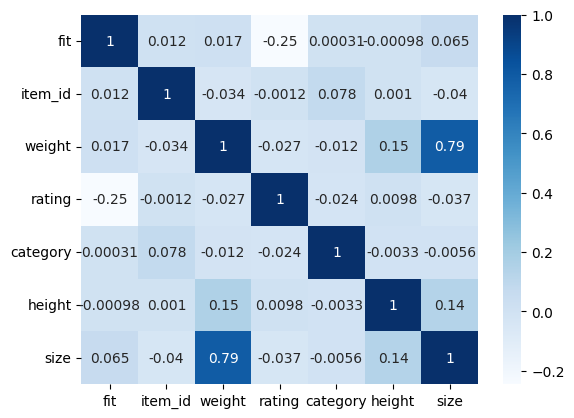

In [17]:
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()